In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.colors import LogNorm

In [7]:
def read_matrix(path):
    with open(path) as f:
        matrix = json.load(f)['matrix']['inner']
        matrix = np.array(matrix)
        print(matrix.shape)
    return matrix
    
def prepare_matrices(matrices):
    global_max = max([matrix.max() for matrix in matrices])
    new_matrices = []
    for matrix in matrices:
        local_max = matrix.max()
        new_matrix = matrix / local_max * global_max
        new_matrix = new_matrix + 1 # ensure there are no 0 values for log-scale
        new_matrices.append(new_matrix)
    return new_matrices

    

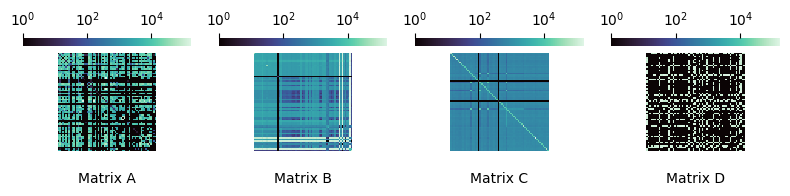

In [44]:
root_dir='/data1/lichenni/projects/per-flow-sim/parsimon-eval/workload/spatials'
# a_ = read_matrix(f'{root_dir}/cluster_a_2_16.json')
# b_ = read_matrix(f'{root_dir}/cluster_b_2_16.json')
# c_ = read_matrix(f'{root_dir}/cluster_c_2_16.json')
# d_ = read_matrix(f'{root_dir}/cluster_d_2_16.json')
a_ = read_matrix(f'{root_dir}/cluster_a_4_16.json')
b_ = read_matrix(f'{root_dir}/cluster_b_4_16.json')
c_ = read_matrix(f'{root_dir}/cluster_c_4_16.json')
d_ = read_matrix(f'{root_dir}/cluster_d_4_16.json')
matrices = prepare_matrices([a_, b_, c_,d_])
a = matrices[0]
b = matrices[1]
c = matrices[2]
d= matrices[3]


label_and_data = [('Matrix A', a), ('Matrix B', b), ('Matrix C', c), ('Matrix D', d)]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2))
for i, (label, data) in enumerate(label_and_data):
    ax = sns.heatmap(data=data, norm=LogNorm(), xticklabels=False, yticklabels=False, square=True, ax=axs[i], cbar_kws={'location':'top'},cmap='mako')
    ax.set_xlabel(label, labelpad=15)
fig.tight_layout()
plt.savefig('figs/matrices.png', bbox_inches='tight')

(384, 384)
(768, 768)
(1536, 1536)
(3072, 3072)


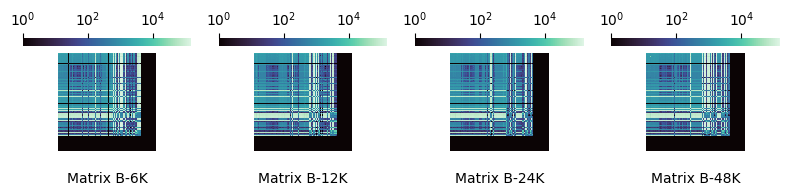

In [10]:
root_dir='/data1/lichenni/projects/per-flow-sim/parsimon-eval/workload/spatials'
a_ = read_matrix(f'{root_dir}/cluster_b.json')
b_ = read_matrix(f'{root_dir}/cluster_b_12k.json')
c_ = read_matrix(f'{root_dir}/cluster_b_24k.json')
d_ = read_matrix(f'{root_dir}/cluster_b_48k.json')
matrices = prepare_matrices([a_, b_, c_,d_])
a = matrices[0]
b = matrices[1]
c = matrices[2]
d= matrices[3]


label_and_data = [('Matrix B-6K', a), ('Matrix B-12K', b), ('Matrix B-24K', c), ('Matrix B-48K', d)]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2))
for i, (label, data) in enumerate(label_and_data):
    ax = sns.heatmap(data=data, norm=LogNorm(), xticklabels=False, yticklabels=False, square=True, ax=axs[i], cbar_kws={'location':'top'},cmap='mako')
    ax.set_xlabel(label, labelpad=15)
fig.tight_layout()
plt.savefig('figs/matrices.png', bbox_inches='tight')

/tmp/ipykernel_3748932/3279028941.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x='x', y='y', hue='kind', ci=None,lw=3)


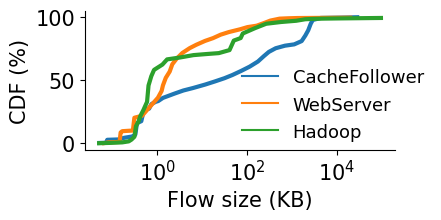

In [2]:
root_dir='/data1/lichenni/projects/per-flow-sim/parsimon-eval/workload/distributions/facebook'
df1 = pd.read_csv(f'{root_dir}/cachefollower-all-extract.csv', header=None, names=['x', 'y'])
df2 = pd.read_csv(f'{root_dir}/webserver-all-extract.csv', header=None, names=['x', 'y'])
df3 = pd.read_csv(f'{root_dir}/hadoop-all-extract.csv', header=None, names=['x', 'y'])

df1.loc[:, 'kind'] = 'CacheFollower'
df2.loc[:, 'kind'] = 'WebServer'
df3.loc[:, 'kind'] = 'Hadoop'

df = pd.concat([df1, df2, df3], ignore_index=True)
df['y']*=100

plt.figure(figsize=(4, 1.8))
_fontsize=15
ax = sns.lineplot(data=df, x='x', y='y', hue='kind', ci=None,lw=3)
ax.get_legend().set_title(None)
ax.get_legend().set_frame_on(False)
sns.despine()
plt.xscale('log')
plt.xlabel('Flow size (KB)', fontsize=_fontsize)
plt.ylabel('CDF (%)', fontsize=_fontsize)
plt.tick_params(labelsize=_fontsize)
plt.legend(loc='upper center', frameon=False, ncol=1, bbox_to_anchor=(0.8, 0.7), fontsize=_fontsize-2)
plt.savefig('figs/flow-sizes.pdf', bbox_inches='tight')